In [1]:
'''
Import packages necessary to run script
'''
# def import_packages():
# import tkinter as tk
# from tkinter import filedialog, simpledialog, messagebox
import math
from statistics import mean, stdev
import numpy as np
import pandas as pd
import random
# import os
# %matplotlib inline
# from datetime import datetime
# import matplotlib.pyplot as plt
# import scipy.stats as sps
# import sys
# import scipy.optimize as spo
# return print('packages imported')
# import_packages()

In [2]:
'''
Fetch working directory, and set modules directory
'''
import os, sys
cwd = os.getcwd()
modules_path = cwd + '\Modules\\'
sys.path.insert(1, modules_path)
print(f"Added {modules_path} as modules folder")

Added C:\Users\Matt\OneDrive - University of Toronto\Scripts\Revised Script - Feb 2022\Modules\ as modules folder


In [3]:
'''
Set up input and output folders and scan settings
'''
def initial_setup(addfolderswithdate, getinput_type):
    import InitialSetup as InitialSetup
    input_output_folders = InitialSetup.get_folders(withdate=addfolderswithdate)
    settings = InitialSetup.get_data_type(get_input=True)
    return (input_output_folders, settings)

addfolderswithdate, getinput_type = False, True #change this to make new folder with date
initial_setup_output = initial_setup(addfolderswithdate, getinput_type)
file_path_input = initial_setup_output[0][0]
file_path_output = initial_setup_output[0][1]
spectra_scan_type = initial_setup_output[1][0]
areas_scan_type = initial_setup_output[1][1]
spectra_check_string = initial_setup_output[1][2]
print(f"Copy input files to /{file_path_input}")

Select the ionization mode
(a) +EI
(b) +CI NH3
(c) +CI CH4
(d) -CI NH3
(e) -CI CH4
Your choice:  b


Select the scan mode
(a) Scan
(b) SIM
Your choice:  b




Copy input files to /Input_Data


In [4]:
'''
Function for retrieving csv file and returning in indicated format
'''
def get_csv(return_type, title, initialdir, skip_blank_lines, skiprows):
    import tkinter as tk
    from tkinter import filedialog
    import GeneralFunctions as GeneralFunctions
    csvfile = tk.filedialog.askopenfilename(title=title, initialdir=initialdir, filetype=(("CSV files", ".csv"), ("all files", "*.*")))
    file = open(csvfile)
    if return_type == 'lines':
        file_lines = GeneralFunctions.get_file_lines(file)
        file.close()
        return(file_lines)
    elif return_type == 'df' :
        file_df = pd.read_csv(file, skip_blank_lines=skip_blank_lines, skiprows=skiprows)
        file.close()
        return(file_df)
    elif return_type == 'both':
        file_df = pd.read_csv(file, skip_blank_lines=skip_blank_lines, skiprows=skiprows)
        file.close()
        file = open(csvfile)
        file_lines = GeneralFunctions.get_file_lines(file)
        file.close()
        return(file_lines, file_df)
print("defined function for retrieving csv files")

defined function for retrieving csv files


In [5]:
'''
Fetch profile in both formats
'''
# profile_lines, profile_df = get_csv(return_type='both', title='Profile', initialdir=file_path_input)
profile_df = get_csv(return_type='df', title='Profile', initialdir=file_path_input, skip_blank_lines=False, skiprows=None)
# can change the return type to lines once I add legacy functionality back in
print("profile file imported")

defined function for exporting aligned peak table as csv
profile file imported


In [6]:
'''
Count the number of features in the profile dataframe
'''
max_feature_count = max(profile_df.count())
min_feature_count = min(profile_df.count())
print(f"{max_feature_count} total features\n {max_feature_count-min_feature_count} feature(s) missing profile data")

7 total features
 0 feature(s) missing profile data


In [7]:
'''
Format and Display the first 5 lines of the profile dataframe
'''
# profile_df['RT'] = profile_df['RT'].astype(float)
# profile_df['Start'] = profile_df['Start'].astype(float)
# profile_df['End'] = profile_df['End'].astype(float)
# profile_df['#Carbons'] = profile_df['#Carbons'].astype(int)
# profile_df['Quasi Mol ion'] = profile_df['Quasi Mol ion'].astype(float)
# profile_df['MW'] = profile_df['MW'].astype(float)
# profile_df['Quasi Mol ion'] = profile_df['Quasi Mol ion'].apply(np.floor)
# profile_df['MW'] = profile_df['MW'].apply(np.floor)
def rename_duplicates(input_series):
    renamed_series = input_series
    series_list = []
    for item in input_series:
        counter = 1
        new_item = str(item)
        while new_item in series_list:
            counter += 1
            new_item = str(item) + '_' + str(counter)
        series_list.append(new_item)
    renamed_series_values = pd.Series(series_list)
    return renamed_series_values

profile_df['Peak'] = rename_duplicates(profile_df['Peak'])
profile_df.head()

,Peak,RT,Start,End,Name,MW,#Carbons,Quasi Mol ion,Formula,RawMW,Exact Mass
0,*Glyoxylate (MeOx & TMS),5.020,4.98,5.05,*Glyoxylate (MeOx & TMS),175,2,193,C10H16,175,136.1252
1,*Serine (2TMS),11.426,11.37,11.56,*Serine (2TMS),249,3,250,C10H16,249,136.1252
2,*Glycine (3TMS),12.627,12.56,12.69,*Glycine (3TMS),291,2,292,C10H16,291,136.1252
3,*Fumarate (2TMS),13.901,13.84,13.99,*Fumarate (2TMS),260,4,278,C10H16,260,136.1252
4,*Aspartate (2TMS),15.739,15.68,15.81,*Aspartate (2TMS),277,4,278,C10H16,277,136.1252


In [8]:
profile_df['Peak']

0    *Glyoxylate (MeOx & TMS)
1              *Serine (2TMS)
2             *Glycine (3TMS)
3            *Fumarate (2TMS)
4           *Aspartate (2TMS)
5              *Malate (3TMS)
6           *Shikimate (4TMS)
Name: Peak, dtype: object

In [9]:
'''
Fetch sample spectra as filelines
'''
spectra_lines = get_csv(return_type='lines', title='Spectra', initialdir=file_path_input, skip_blank_lines=False, skiprows=None)
print("spectra file imported")

spectra file imported


In [10]:
'''
Count the total number of spectra in the spectra file
'''
count_spectra = len(spectra_lines)
print(f"{count_spectra} total spectra lines imported")

15152 total spectra lines imported


In [11]:
'''
Fetch the spectrum for each feature in the spectra input file
'''

def get_sampleID(line_string):
    ## works to return sample ID from full info line
    ## #"+CI Scan (rt: 4.762 min) 210505_NH3-pos-split-scan_361-R2.D  Subtract "
    start_character = "min) "
    end_character = ".D"
    start_index = line_string.rfind(start_character) + len(start_character)
    end_index = line_string.rfind(end_character)
    sampleID = line_string[start_index:end_index]
    return sampleID

def get_spectrum_rt(sample_details):
    ## works to return rt of spectrum from info line
    ## #"+CI Scan (rt: 4.762 min) 210505_NH3-pos-split-scan_361-R2.D  Subtract "
    left_character = "(rt: "
    right_character = " min)"
    left_index = sample_details.find(left_character) + len(left_character)
    right_index = sample_details.find(right_character)
    rt = float(sample_details[left_index:right_index])
    return rt

def fetch_spectra_from_lines(spectra_lines, spectra_check_string):
    print(spectra_check_string)
    all_features_list = []
    ### Add in all features to a list with [[sample name, [rt,[xs],[ys]],[rt,[xs],[ys]],...],[sample name, [rt,[xs],[ys]],[rt,[xs],[ys]],...],...]
    sample_name = "no sample name imported"
    first_spectrum = True
    feature_rt = int
    exceptions = 0
    
    line_counter = 0
    feature_counter = 0
    for line in spectra_lines:
        line_counter += 1
        # go through each line in the spectra file
        if "#" in line:
        # info line or headers
            if spectra_check_string in line:
                # sample & spectra information line
                # new spectrum
                feature_counter +=1
                
                if first_spectrum:
                    #do not append previous spectrum if this is the first one (otherwise appends empty spectrum)
                    spectrum_x, spectrum_y, this_spectrum, this_feature = [],[],[],[] # prepare initial empty lists
                    first_spectrum = False # add next spectrum to list of all spectra
                elif not first_spectrum:
                    # add spectrum to list of all spectra
                    #this_spectrum.append(spectrum_x)
                    #this_spectrum.append(spectrum_y)
                    #this_feature.append(this_spectrum)
                    this_feature.append(spectrum_x)
                    this_feature.append(spectrum_y)
                    all_features_list.append(this_feature)
                spectrum_x, spectrum_y, this_spectrum, this_feature = [],[],[],[] # reset to prepare for next feature with the following properties
                # set the following parameters after appending the previous feature information
                spectrum_rt = get_spectrum_rt(line)
                sample_ID = get_sampleID(line)
                this_feature = [sample_ID, spectrum_rt]
    #             print(all_features_list)

                
        elif len(line) > 2:
            #line containing single m/z and abundance [point,m/z,abundance]
            this_line = line.strip()
            this_line = this_line.split(',')
            spectrum_x.append(float(this_line[1]))
            spectrum_y.append(float(this_line[2]))
                
    
    # final spectrum must be appended to the list
#     this_spectrum.append(spectrum_x)
#     this_spectrum.append(spectrum_y)
    this_feature.append(spectrum_x)
    this_feature.append(spectrum_y)
#     this_feature.append(this_spectrum)
    all_features_list.append(this_feature)
#     print(all_features_list)
    print(f"{line_counter} lines processed; spectra extracted for {feature_counter} total features")
    return all_features_list # output as [[sample name,rt,[xs],[ys]],[sample name,rt,[xs],[ys]],...]
print("defined functions for extracting spectra from csv file")


unsorted_spectra = fetch_spectra_from_lines(spectra_lines, spectra_check_string)

defined functions for extracting spectra from csv file
SIM
15152 lines processed; spectra extracted for 635 total features


In [12]:
'''
sort and organize the list of spectra as a dataframe
'''
def sort_spectra_list(unsorted_spectra):
    columnheaders = 'SampleID', 'RT', 'm/z list', 'Abundance list' # headers for the dataframe
    unsorted_spectra_df = pd.DataFrame(unsorted_spectra, columns = columnheaders) # make a dataframe from the unsorted spectra list with indicated headers
    sorted_spectra_df = unsorted_spectra_df # copy the dataframe before sorting
    sorted_spectra_df = sorted_spectra_df.sort_values(['SampleID', 'RT']) # sort by SampleID then by RT of spectrum
    return sorted_spectra_df # retrun the sorted spectra as a dataframe
print("defined the function for sorting spectra")

sorted_spectra_df = sort_spectra_list(unsorted_spectra)

print(f"sorted all imported spectra\n{len(sorted_spectra_df)} spectra retained from {sorted_spectra_df['SampleID'].nunique()} distinct samples")

defined the function for sorting spectra
sorted all imported spectra
635 spectra retained from 91 distinct samples


In [13]:
profile_df.head()

,Peak,RT,Start,End,Name,MW,#Carbons,Quasi Mol ion,Formula,RawMW,Exact Mass
0,*Glyoxylate (MeOx & TMS),5.020,4.98,5.05,*Glyoxylate (MeOx & TMS),175,2,193,C10H16,175,136.1252
1,*Serine (2TMS),11.426,11.37,11.56,*Serine (2TMS),249,3,250,C10H16,249,136.1252
2,*Glycine (3TMS),12.627,12.56,12.69,*Glycine (3TMS),291,2,292,C10H16,291,136.1252
3,*Fumarate (2TMS),13.901,13.84,13.99,*Fumarate (2TMS),260,4,278,C10H16,260,136.1252
4,*Aspartate (2TMS),15.739,15.68,15.81,*Aspartate (2TMS),277,4,278,C10H16,277,136.1252


In [14]:
sorted_spectra_df.head()

,SampleID,RT,m/z list,Abundance list
275,220302_NH3_PCI-SIM_145,5.017,"[193.0, 194.0, 195.0]","[63.7083206176758, 0.811626434326172, 4.462009..."
384,220302_NH3_PCI-SIM_145,11.460,"[250.0, 251.0, 252.0, 253.0, 264.0, 265.0, 266...","[0.0, 0.0, 0.0, 0.0, 0.0555839538574219, 0.0, ..."
201,220302_NH3_PCI-SIM_145,12.633,"[250.0, 251.0, 252.0, 253.0, 264.0, 265.0, 266...","[0.336280822753906, 0.141067504882813, 0.0, 0...."
550,220302_NH3_PCI-SIM_145,12.943,"[250.0, 251.0, 252.0, 253.0, 264.0, 265.0, 266...","[0.610153198242188, 0.361114501953125, 0.35122..."
80,220302_NH3_PCI-SIM_145,13.953,"[219.0, 220.0, 221.0, 222.0, 223.0, 224.0, 250...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 56.883701324462..."


In [15]:
detailed_spectra_df = sorted_spectra_df

In [16]:
'''
Still need to comment this section
'''
def roundedmz(mz):
    mzfloor = math.floor(mz)
    decimal = mz - mzfloor
    if decimal > 0.7:
        return math.ceil(mz)
    else:
        return mzfloor

def calculate_rawF(xs, ys, Quasi_mol_ion, ncarbons):
    upperx = Quasi_mol_ion + ncarbons + 0.7
    lowerx = Quasi_mol_ion - 0.3
    rawF_df = pd.DataFrame({'x':xs,'y':ys})
    rawF_df['m/z for label calc'] = rawF_df['y'].where((rawF_df['x'] >= lowerx) & (rawF_df['x'] <= upperx), 0)
    abund_sum =  rawF_df['m/z for label calc'].sum()
    rawF_df['RelAbund'] = rawF_df['m/z for label calc'] / abund_sum
    rawF_df['roundx'] = rawF_df['x'].apply(roundedmz)
    rawF_df['labels'] = (rawF_df['x'] - lowerx).where((rawF_df['m/z for label calc'] > 0), None)
    rawF_df['F'] = rawF_df['RelAbund'] * rawF_df['labels'] / ncarbons
    rawF = rawF_df['F'].sum()
    return rawF, rawF_df



In [17]:
'''
This section is for getting all the spectra into a table and include most likely profile match. the other one is for matching spectra to the profile.
Still need to comment this section
'''
def match_profile_to_spectra(detailed_spectra_df, profile_df, minabund):
    #RT error if RT outside of profile bounds, Abund error if Max(Abund) < x
    details_list = []
    # details_list = [in_profile_column,likely_peak_column,likely_rt_column,rt_diff,likely_QuasiMolIon_column,likely_ncarbons_column,rawF_column]
    columnheaders = ['Error Flags','In profile?','ProfileID','ProfileRT','RT difference','Profile quasi mol ion', 'Profile #carbons', 'RawF']
    minabund = minabund # minabundance below this value records an error flag in the output
    details_all_features = []
    print("Aligning all features with possible profile matches")
    for index,row in detailed_spectra_df.iterrows():
        spectrum = rt,xs,ys = row[1],row[2],row[3]
        possible_features = []
        in_profile = False
        for index1,profilefeature in profile_df.iterrows():
            this_feature = []
            flag = None
            lowerrt, upperrt = profilefeature['Start'],profilefeature['End']
            if lowerrt < rt < upperrt: # feature rt is within profile rt bounds
                # feature confirmed in profile
                flag = None
                maxy = float(max(ys))
                if maxy < minabund:
                    flag = 'Abund error'
                in_profile = True
                profileID, profileRT, profile_quasimolion, profile_ncarbons = profilefeature['Peak'], profilefeature['RT'], profilefeature['Quasi Mol ion'], profilefeature['#Carbons']
                RT_difference = rt - profilefeature['RT']
                RT_difference = round(RT_difference,4)
                rawF, rawF_df = calculate_rawF(xs, ys, Quasi_mol_ion=profilefeature['Quasi Mol ion'], ncarbons=profilefeature['#Carbons'])
                this_feature=[flag,in_profile,profileID,profileRT,RT_difference,profile_quasimolion,profile_ncarbons,rawF]
                possible_features.append(this_feature)
        if in_profile:
            possible_features_df = pd.DataFrame(possible_features,columns=columnheaders)
            this_feature_df = possible_features_df[possible_features_df['RT difference'] == possible_features_df['RT difference'].min()]
            '''
            I want to add in functionality here to compare abundance of quasi molecular ion and weight selection by abundance and RT difference
            '''
            this_feature = this_feature_df.loc[0].tolist()
        else:
            flag = 'RT error' # feature not found in profile
            profileID, profileRT, RT_difference, profile_quasimolion, profile_ncarbons, rawF = None, None, None, None, None, None
            this_feature=[flag,in_profile,profileID,profileRT,RT_difference,profile_quasimolion,profile_ncarbons,rawF]
        details_all_features.append(this_feature)

    details_df = pd.DataFrame(details_all_features, columns=columnheaders, index=detailed_spectra_df.index)
    all_features_with_details_df = pd.concat([detailed_spectra_df, details_df], axis=1, ignore_index=False, sort=False)
    filtered_features_with_details_df = all_features_with_details_df[all_features_with_details_df['In profile?'] == True]
    return all_features_with_details_df, filtered_features_with_details_df




In [18]:
'''
This section is for getting the most likely spectrum for each profile feature.
Still need to comment this section
'''
def match_spectra_to_profile(detailed_spectra_df, profile_df, minabund):
    #RT error if RT outside of profile bounds, Abund error if Max(Abund) < x
    minabund = minabund # maxabundance below this value records an error flag in the output
    detailed_spectra_df_split = [y for x, y in detailed_spectra_df.groupby('SampleID', as_index=False)] # Split dataframe by SampleID
    profile_headers = profile_df.columns.tolist()
    extra_headers = ['SampleID','In profile?','Error Flags','RT difference','RT','m/z list','abundance list','RawF']
    columnheaders = profile_headers + extra_headers
    all_rows = [columnheaders]
    
    unique_samples = pd.unique(detailed_spectra_df['SampleID']).tolist()
    simplified_headers = profile_headers + unique_samples
    all_simplified_features = []
    
    super_simple_headers = ['Peak'] + unique_samples
    all_super_simple_features = []
    
    
    
    for index1,profilefeature in profile_df.iterrows():
        profileID, profileRT, profile_quasimolion, profile_ncarbons = profilefeature['Peak'], profilefeature['RT'], profilefeature['Quasi Mol ion'], profilefeature['#Carbons']
        profile_line = profilefeature.tolist()
        this_simplified_feature = profilefeature.tolist()
        this_super_simple_feature = [profileID]
        this_feature = []
        flag = None
        lowerrt, upperrt = profilefeature['Start'],profilefeature['End']
        previous_sample = None
        first_run_for_feature = True
                
        for sample in detailed_spectra_df_split:
            in_profile=False
            possible_features = []
            sampleID = sample['SampleID'].iloc[0]
#             print(sampleID)
            
            for index1,feature in sample.iterrows():
                this_feature = []
                spectrum = rt,xs,ys = feature[1],feature[2],feature[3]
                if lowerrt < rt < upperrt: # feature rt is within profile rt bounds
                    # feature confirmed in profile
                    flag = None
                    in_profile = True
                    try:
                        maxy = float(max(ys))
                    except:
                        maxy = 0
                        
                    if maxy < minabund:
                        flag = 'Abund error'
                    
                    RT_difference = rt - profileRT
                    RT_difference = round(RT_difference,4)
                    this_feature=[flag,RT_difference,rt,xs,ys]
                    possible_features.append(this_feature)
            if in_profile:
                possible_features_df = pd.DataFrame(possible_features,columns=['flag','RT_difference','rt','xs','ys'])
                
                this_feature_df = possible_features_df[possible_features_df['RT_difference'] == possible_features_df['RT_difference'].min()]
                this_feature_df = this_feature_df.loc[0]
                
                xs, ys = this_feature_df['xs'], this_feature_df['ys']
                rawF, rawF_df = calculate_rawF(xs, ys, Quasi_mol_ion=profile_quasimolion, ncarbons=profile_ncarbons)
                
                this_feature = [sampleID, in_profile]
                this_feature = this_feature + (this_feature_df.tolist())
                this_feature.append(rawF)

                this_row = profile_line + this_feature
                all_rows.append(this_row)
                this_simplified_feature.append(rawF)
                this_super_simple_feature.append(rawF)
                
#                 print(f"{profileID} added for {sampleID}")
            else:
                this_simplified_feature.append(None)
                this_super_simple_feature.append(None)
#                 print(f"{profileID} not found for {sampleID}")
        all_simplified_features.append(this_simplified_feature)
        all_super_simple_features.append(this_super_simple_feature)
#         print(f"{profileID} completed")
    
    detailed_rawF_df = pd.DataFrame(all_rows,columns=columnheaders)
    simplified_rawF_df = pd.DataFrame(all_simplified_features,columns=simplified_headers)
    super_simple_rawF_df = pd.DataFrame(all_super_simple_features, columns = super_simple_headers)
    return(detailed_rawF_df, simplified_rawF_df, super_simple_rawF_df)

#     return(detailed_rawF_df, simplificed_rawF_df)
            
    



In [19]:
data_prioritization_type = 'profile' # 'profile' or 'sample'
print(f"{data_prioritization_type} data prioritization type selected")



if data_prioritization_type == 'sample':
    all_features_with_details_df, filtered_features_with_details_df = match_profile_to_spectra(detailed_spectra_df, profile_df, minabund=10)
    print("Dataframe for all features with details complete")
    output_file_name = 'all_features_with_details_RawF.csv'
    print(f"Exporting all_features_with_details_df as {output_file_name} to {file_path_output}")
    output_file_name_path = os.path.join(file_path_output, output_file_name)
    try:
        all_features_with_details_df.to_csv(output_file_name_path, sep=',', na_rep='', index=False)
        print("Export complete")
    except:
        print(f"Error in exporting {output_file_name} to {output_file_name_path}.\nMake sure a file with this name is not already open.\nContinuing without exporting this file.")

    all_features_with_details_df.head()
else:
    print("Processing detailed rawF data table...")
    detailed_rawF_df, simplified_rawF_df, super_simple_rawF_df = match_spectra_to_profile(detailed_spectra_df, profile_df, minabund=10)
    print("Dataframe for all features with details complete")
    output_file_name1 = 'detailed_rawF_df.csv'
    output_file_name2 = 'simplified_rawF_df.csv'
    print(f"Exporting {output_file_name1} and {output_file_name2} to {file_path_output}")
    output_file_name_path1 = os.path.join(file_path_output, output_file_name1)
    output_file_name_path2 = os.path.join(file_path_output, output_file_name2)
    try:
        detailed_rawF_df.to_csv(output_file_name_path1, sep=',', na_rep='', index=False)
        print("Export complete")
    except:
        print(f"Error in exporting {output_file_name1} to {output_file_name_path1}.\nMake sure a file with this name is not already open.\nContinuing without exporting this file.")
    try:
        simplified_rawF_df.to_csv(output_file_name_path2, sep=',', na_rep='', index=False)
        print("Export complete")
    except:
        print(f"Error in exporting {output_file_name2} to {output_file_name_path2}.\nMake sure a file with this name is not already open.\nContinuing without exporting this file.")

    simplified_rawF_df.head()
print("all exports complete")   
    

profile data prioritization type selected
Processing detailed rawF data table...
Dataframe for all features with details complete
Exporting detailed_rawF_df.csv and simplified_rawF_df.csv to Output_Data
Export complete
Export complete
all exports complete


In [20]:
super_simple_rawF_df.head()

,Peak,220302_NH3_PCI-SIM_145,220302_NH3_PCI-SIM_181,220302_NH3_PCI-SIM_182,220302_NH3_PCI-SIM_185,220302_NH3_PCI-SIM_448,220302_NH3_PCI-SIM_455,220302_NH3_PCI-SIM_463,220302_NH3_PCI-SIM_471,220302_NH3_PCI-SIM_475,...,221006_NH3_PCI_SIM_1250ng-r3,221006_NH3_PCI_SIM_1500ng-r1,221006_NH3_PCI_SIM_1500ng-r2,221006_NH3_PCI_SIM_1500ng-r3,221006_NH3_PCI_SIM_2000ng_r1,221006_NH3_PCI_SIM_2000ng_r2,221006_NH3_PCI_SIM_2000ng_r3,221006_NH3_PCI_SIM_500ng-r1,221006_NH3_PCI_SIM_500ng-r2,221006_NH3_PCI_SIM_500ng-r3
0,*Glyoxylate (MeOx & TMS),0.220567,0.259652,0.223282,0.248527,0.209900,0.203091,0.231357,0.203023,0.248904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,*Serine (2TMS),0.000000,0.898006,0.675571,0.639446,0.282192,0.000000,0.837100,0.377480,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,*Glycine (3TMS),1.092615,1.150000,0.721326,0.758231,0.593027,0.440289,1.128586,0.475654,0.741642,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,*Fumarate (2TMS),0.174234,0.188612,0.181034,0.186585,0.234029,0.186205,0.196372,0.173283,0.228555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,*Aspartate (2TMS),0.649902,0.650469,0.645206,0.650272,0.175950,0.654335,0.651679,0.635862,0.641390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
'''
Section incomplete and temporarily abandoned in favor of profile prioritization
'''

# if data_prioritization_type == 'sample':
#     filtered_features_with_details_df['Profile quasi mol ion'] = filtered_features_with_details_df['Profile quasi mol ion'].astype(int)
#     filtered_features_with_details_df['Profile #carbons'] = filtered_features_with_details_df['Profile #carbons'].astype(int)
#     filtered_features_with_details_df.head()
#     short_df = filtered_features_with_details_df[['SampleID','ProfileID','RawF']]
#     short_df.head()
#     '''
#     So far this method seems far less efficient than my old one that iterated through lists
#     '''
#     unique_samples = pd.unique(short_df['SampleID'])
#     print(f"Fetching simplified labeling data for {len(unique_samples)} unique sample(s): {unique_samples}")
#     combined_df = profile_df.drop(columns = ['Area','Height','Width','FWHM','Name','RawMW'])
#     for sample in unique_samples:
#         print(f"working on {sample}")
#         this_df = short_df[short_df['SampleID'] == sample]
#         this_df = this_df.drop(columns = ['SampleID'])
#         this_df.rename(columns={'ProfileID':'Peak', 'RawF':sample}, inplace=True)
#         combined_df = pd.merge(combined_df, this_df, how='left',on=["Peak"])
#     combined_df.head()
#     print(f"combined RawF data from all {len(unique_samples)} unique sample(s) into a single dataframe")
#     #simple_rawF_df
#     simple_rawF_list = [] # All samples will have the RawF assigned to a single list for each feature to make one table of RawF values
#     headers = ['SampleID'] # The first column will be Sample ID
#     profile_features_list = []
#     for index1,profilefeature in profile_df.iterrows(): # Iterate through each feature in the profile
#         peak = profilefeature['Peak'] # Get the name of this feature from the dataframe
#         headers.append(peak) # Each feature (peak) in the profile has its name added to the list of headers
#         profile_features_list.append(peak)

#     print(profile_features_list)

#     first_run = True
#     for index1,sample in filtered_features_with_details_df.iterrows(): # iterate through each row in the dataframe
#         sampleID = sample['SampleID'] # get sampleID from dataframe for this feature
#         if first_run: # Check if this is the first row in the dataframe
#             previous_sampleID = sampleID
#             this_feature = [sampleID]
#             first_run = False # Don't use this function anymore after it has been run once

#         if sampleID == previous_sampleID: # same sample
#             print('same sample')

'\nSection incomplete and temporarily abandoned in favor of profile prioritization\n'

In [22]:
def get_areas_df(file_path_input):
    print("fetching areas")
    areas_df = get_csv(return_type='df', title='Areas', initialdir=file_path_input, skip_blank_lines=True, skiprows=1)
    areas_df.columns.values[0] = 'SampleID'
    areas_df.head()
    return areas_df

In [23]:
def get_sampleID_from_area(sample_file):
    ## works to return sample ID from full info line
    ## #"+CI Scan (rt: 4.762 min) 210505_NH3-pos-split-scan_361-R2.D  Subtract "
    start_character = "\\"
    end_character = ".D"
    start_index = sample_file.rfind(start_character) + len(start_character)
    end_index = sample_file.rfind(end_character)
    sampleID = sample_file[start_index:end_index]
    return sampleID

In [24]:
def get_area_tables(profile_df, areas_df):
    print("Separating features by sample")
    areas_df_split = [y for x, y in areas_df.groupby('SampleID', as_index=False)] # Split dataframe by SampleID

    profile_headers = profile_df.columns.tolist()
    extra_headers = ['sampleID', 'in_profile', 'flag','RT_difference']
    area_headers = areas_df.columns.tolist()
    feature_headers = extra_headers + area_headers
    columnheaders = profile_headers + extra_headers + area_headers
    all_rows = [columnheaders]

    simplified_headers = profile_headers
    all_simplified_features = []

    first_run_for_sample = True
    for index1,profilefeature in profile_df.iterrows():
        profileID, profileRT, lowerrt, upperrt = profilefeature['Peak'], profilefeature['RT'], profilefeature['Start'], profilefeature['End']
#         print(f"Working on: {profileID}")
        profile_line = profilefeature.tolist()
        this_simplified_feature = profilefeature.tolist()
        this_feature = []
        flag, previous_sample, first_run_for_feature = None, None, True
        sample_counter = 0 
        for sample_df in areas_df_split:
            sample_df['RT'] = pd.to_numeric(sample_df['RT'], errors='coerce') # Sets non numeric as NaN
            sample_df = sample_df[sample_df['RT'] > 0]
            if len(sample_df) > 0: # Only process data files and lines with at least 1 features
                sample_file = sample_df['SampleID'].iloc[0]
                sampleID = get_sampleID_from_area(sample_file)                 
#                 print(f"processing: {sampleID}")
                if first_run_for_sample:
                    simplified_headers.append(sampleID)
                in_profile=False
                possible_features = []

    #                 rt_index = sample_df.columns.get_loc("RT")
    #                 area_index = sample_df.columns.get_loc("Area")
                for index1,feature in sample_df.iterrows():
                    this_feature = []
                    rt,area = feature['RT'],feature['Area']
                    if lowerrt < rt < upperrt: # feature rt is within profile rt bounds
                        # feature confirmed in profile
                        flag = None
                        in_profile = True
                        RT_difference = rt - profileRT
                        RT_difference = round(RT_difference,4)
                        this_feature=[sampleID, in_profile, flag, RT_difference]
                        feature_values = feature.values.tolist()
                        this_feature = this_feature + feature_values
                        possible_features.append(this_feature)

                if in_profile:
                    sample_counter += 1
                    possible_features_df = pd.DataFrame(possible_features,columns=feature_headers)
                    this_feature_df = possible_features_df[possible_features_df['RT_difference'] == possible_features_df['RT_difference'].min()]
                    this_feature_df = this_feature_df.loc[0]
                    area = this_feature_df['Area']
                    this_feature = this_feature_df.tolist()
                    this_row = profile_line + this_feature
                    all_rows.append(this_row)
                    this_simplified_feature.append(area)
    #                 print(f"{profileID} added for {sampleID}")
                else:
                    this_simplified_feature.append(None)
    #                 print(f"{profileID} not found for {sampleID}")
        all_simplified_features.append(this_simplified_feature)
        first_run_for_sample = False
        print(f"{profileID} found in {sample_counter} samples.")
            
    #         print(f"{profileID} completed")
#     simplified_area_table = simplified_headers + all_simplified_features
    detailed_areas_df = pd.DataFrame(all_rows,columns=columnheaders)
    simplified_areas_df = pd.DataFrame(all_simplified_features,columns=simplified_headers)
    return(detailed_areas_df, simplified_areas_df)




In [25]:

def ask_areas():
    '''ask if user wants to get area data'''
    from tkinter.messagebox import askyesno
    title = 'Process peak area data?'
    message = 'Would you like to process peak area data?'
    get_areas = askyesno(title=title, message=message)
    return get_areas

def process_areas(file_path_input, file_path_output):
    get_areas = ask_areas()
    if get_areas is True:
        areas_df = get_areas_df(file_path_input)
        print("Processing areas data table...")
        detailed_areas_df, simplified_areas_df = get_area_tables(profile_df, areas_df)
        print("Dataframe for all features with details complete")
        output_file_name1 = 'detailed_areas_df.csv'
        output_file_name2 = 'simplified_areas_df.csv'
        print(f"Exporting {output_file_name1} and {output_file_name2} to {file_path_output}")
        output_file_name_path1 = os.path.join(file_path_output, output_file_name1)
        output_file_name_path2 = os.path.join(file_path_output, output_file_name2)
        try:
            detailed_areas_df.to_csv(output_file_name_path1, sep=',', na_rep='', index=False, header=False)
            print("Export complete")
        except:
            print(f"Error in exporting {output_file_name1} to {output_file_name_path1}.\nMake sure a file with this name is not already open.\nContinuing without exporting this file.")
        try:
            simplified_areas_df.to_csv(output_file_name_path2, sep=',', na_rep='', index=False, header=True)
            print("Export complete")
        except:
            print(f"Error in exporting {output_file_name2} to {output_file_name_path2}.\nMake sure a file with this name is not already open.\nContinuing without exporting this file.")

        simplified_areas_df.head()
    else:
        print("No peak area analysis")
        # quit()
        simplified_areas_df = pd.DataFrame()
    return simplified_areas_df
        
simplified_areas_df= process_areas(file_path_input, file_path_output)
use_areas = False
if simplified_areas_df.empty != True:
    use_areas = True
    

No peak area analysis


In [26]:
print (use_areas)

False


In [27]:
'''
functional above here
'''

'\nfunctional above here\n'

In [28]:
'''
Need do double check below here
'''

'\nNeed do double check below here\n'

In [29]:
'''
Get sample info
'''
def get_info_df(file_path_input):
    print("fetching sample info")
    info_df = get_csv(return_type='df', title='Info', initialdir=file_path_input, skip_blank_lines=True, skiprows=0)
    return info_df

info_df = get_info_df(file_path_input)
print("sample info imported")
info_df.head()


fetching sample info
sample info imported


,Plant no.,Type of plant,Notes,User,Date in growth chamber,Date labelled,Age (days),Light intensity (PAR_,Time of day labelled 13C (hh:mm),Adapt time (hrs:min),...,sec,wgt of tissue used (mg),Additional notes,Group,Total labelling time (min) uncorrected,Details,Original Treatment,Sample number,Treatment,Total labelling time (min) corrected
0,496,WT,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,0,5.04,Unknown,WT,0.000000,Unknown,WT,496,WT,0.00
1,511,WT,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,0,4.97,Unknown,WT,0.170000,Unknown,WT,511,WT,0.08
2,510,WT,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,0,4.96,Unknown,WT,0.216667,Unknown,WT,510,WT,0.13
3,507,WT,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,0,5.00,Unknown,WT,0.270000,Unknown,WT,507,WT,0.18
4,508,WT,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,0,5.01,Unknown,WT,0.380000,Unknown,WT,508,WT,0.30


In [30]:
'''
Format RawF data for use with sample info
'''
# super_simple_rawF_df_transposed = super_simple_rawF_df.set_index('Peak')
super_simple_rawF_df_transposed = super_simple_rawF_df.rename(columns={'Peak':'Sample index'})
super_simple_rawF_df_transposed = super_simple_rawF_df_transposed.set_index('Sample index')
super_simple_rawF_df_transposed = super_simple_rawF_df_transposed.transpose()
super_simple_rawF_df_transposed['SampleID'] = super_simple_rawF_df_transposed.index



super_simple_rawF_df_transposed.head()

Sample index,*Glyoxylate (MeOx & TMS),*Serine (2TMS),*Glycine (3TMS),*Fumarate (2TMS),*Aspartate (2TMS),*Malate (3TMS),*Shikimate (4TMS),SampleID
220302_NH3_PCI-SIM_145,0.220567,0.000000,1.092615,0.174234,0.649902,0.202482,0.150981,220302_NH3_PCI-SIM_145
220302_NH3_PCI-SIM_181,0.259652,0.898006,1.150000,0.188612,0.650469,0.212350,0.170707,220302_NH3_PCI-SIM_181
220302_NH3_PCI-SIM_182,0.223282,0.675571,0.721326,0.181034,0.645206,0.215222,0.159151,220302_NH3_PCI-SIM_182
220302_NH3_PCI-SIM_185,0.248527,0.639446,0.758231,0.186585,0.650272,0.216323,0.161586,220302_NH3_PCI-SIM_185
220302_NH3_PCI-SIM_448,0.209900,0.282192,0.593027,0.234029,0.175950,0.201010,0.149335,220302_NH3_PCI-SIM_448


In [31]:
def get_sample_number(sampleID):
    start = sampleID.rfind('_') + 1
    sample_number = sampleID[start:]
    return sample_number
def get_sample_number_column(transposed_df1):
    transposed_df2 = transposed_df1
    sample_number_list = []
    for sampleID in transposed_df2['SampleID']:
        try:
            sample_number = get_sample_number(sampleID)
        except:
            sample_number = np.nan
        sample_number_list.append(sample_number)
    transposed_df2['Sample number'] = sample_number_list
    print("Sample number column added")
    return transposed_df2
simplified_rawF_df_transposed = get_sample_number_column(super_simple_rawF_df_transposed)

Sample number column added


In [32]:
simplified_rawF_df_transposed.head()

Sample index,*Glyoxylate (MeOx & TMS),*Serine (2TMS),*Glycine (3TMS),*Fumarate (2TMS),*Aspartate (2TMS),*Malate (3TMS),*Shikimate (4TMS),SampleID,Sample number
220302_NH3_PCI-SIM_145,0.220567,0.000000,1.092615,0.174234,0.649902,0.202482,0.150981,220302_NH3_PCI-SIM_145,145
220302_NH3_PCI-SIM_181,0.259652,0.898006,1.150000,0.188612,0.650469,0.212350,0.170707,220302_NH3_PCI-SIM_181,181
220302_NH3_PCI-SIM_182,0.223282,0.675571,0.721326,0.181034,0.645206,0.215222,0.159151,220302_NH3_PCI-SIM_182,182
220302_NH3_PCI-SIM_185,0.248527,0.639446,0.758231,0.186585,0.650272,0.216323,0.161586,220302_NH3_PCI-SIM_185,185
220302_NH3_PCI-SIM_448,0.209900,0.282192,0.593027,0.234029,0.175950,0.201010,0.149335,220302_NH3_PCI-SIM_448,448


In [33]:
if use_areas == True:
    simplified_areas_df_transposed = simplified_areas_df.rename(columns={'Peak':'Sample index'})
    simplified_areas_df_transposed = simplified_areas_df_transposed.set_index('Sample index')
    simplified_areas_df_transposed = simplified_areas_df_transposed.transpose()
    simplified_areas_df_transposed['SampleID'] = simplified_areas_df_transposed.index
# simplified_areas_df_transposed
    simplified_areas_df_transposed = get_sample_number_column(simplified_areas_df_transposed)
    
        

In [34]:
'''
Merge sample info and RawF (this table could be exported)
'''
def merge_dataframes(left_df, right_df, column):
    left = left_df
    left[column]=left[column].astype(str)
    right = right_df
    right[column]=right[column].astype(str)
    merged_df = pd.merge(left, right, on=column)
    merged_df.columns = merged_df.columns.str.replace("\r", "")
    merged_df.columns = merged_df.columns.str.replace("\n", "")
    merged_df.columns = merged_df.columns.str.replace("predicted", "")
    return merged_df
df_AlignedRawFTableAndInfo = merge_dataframes(left_df=simplified_rawF_df_transposed, right_df=info_df, column='Sample number')
print('dataframes merged')
df_AlignedRawFTableAndInfo.index = df_AlignedRawFTableAndInfo['SampleID']





dataframes merged


In [35]:
def get_internal_standard(peak_list):
    print(f'Peak List: {peak_list}')
    internal_standard = '*Tropate (2TMS)'
    print(f'Internal Standard: {internal_standard}')
    return internal_standard

In [36]:
if use_areas == True:
    df_AlignedRawAreaTableAndInfo = merge_dataframes(left_df=simplified_areas_df_transposed, right_df=info_df, column='Sample number')
    df_AlignedRawAreaTableAndInfo.index = df_AlignedRawAreaTableAndInfo['SampleID']
    df_RelAreasAndInfo = df_AlignedRawAreaTableAndInfo
#     InternalStandard = '*Tropate (2TMS)'
    peak_list=profile_df['Peak'].tolist()
    internal_standard = get_internal_standard(peak_list)
    for feature in profile_df['Peak']:
        df_RelAreasAndInfo[feature] = df_RelAreasAndInfo[feature].astype(float)/df_AlignedRawAreaTableAndInfo[internal_standard].astype(float)
#     print(df_RelAreasAndInfo.head())

In [37]:
'''
Separate into labeled and unlabeled
'''
def check_unlabelled(df): # add in a column (series) to dataframe for if sample is unlabeled
    new_df = df.sort_values('Total labelling time (min) corrected') # sort the dataframe based on labelling time (this will stack the unlabeled samples at the top)
    new_df['Unlabelled'] = np.where(new_df['Total labelling time (min) corrected'] == 0, True, False) # new column in dataframe called 'Unlabelled' is True if labeling time is 0 
    return new_df # return the dataframe containing a new column for if the samples are labeled or unlabeled

def oulier_removed_series(series): # calculate quartiles and remove outliers from series
    Q1 = series.quantile(0.25) # quartile 1
    Q3 = series.quantile(0.75) # quartile 3
    IQR = Q3 - Q1 # interquartile range
    new_series = series.where((series > (Q1 - 1.5 * IQR)) & (series < (Q3 + 1.5 * IQR)), np.nan) # replace outliers with NaN
    return new_series # return series with outliers replaced by NaNs

def get_unlabelled_df(df,start_index,end_index): # get a dataframe containing only the unlabeled samples
    df_AlignedRawFTableAndInfo = df # already added 'Unlabelled' column
    unlabelled_df = df_AlignedRawFTableAndInfo[df_AlignedRawFTableAndInfo['Unlabelled'] == True] # keep rows only where 'unlabelled' column is True
    for feature in unlabelled_df.iloc[:,start_index:end_index]: # go through each feature in unlabelled samples df
        unlabelled_df[feature] = oulier_removed_series(unlabelled_df[feature]) # remove outliers from unlabelled samples for each feature to provide a more reliable unlabelled/background calculation
    return unlabelled_df # return the dataframe of unlabeled samples with outliers removed

def calc_F_all(df_AlignedRawFTableAndInfo):
    
    df_AlignedRawFTableAndInfo = check_unlabelled(df_AlignedRawFTableAndInfo) # Creates new column ['Unlabelled'] where True implies sample is unlabelled control
    index_column_name = 'SampleID' # indicate the name of the dataframe column to use for the index
    index_column = df_AlignedRawFTableAndInfo[index_column_name] # index the dataframe based on the previously defined column
    
    last_column_index = df_AlignedRawFTableAndInfo.columns.get_loc(index_column_name) # Get the index for the plant_number column (where the data stops and the sample info begins) 
    
    unlabelled_df = get_unlabelled_df(df_AlignedRawFTableAndInfo, start_index=0, end_index=last_column_index)
    cols = list(df_AlignedRawFTableAndInfo.columns)
    df_AlignedRawFTableAndInfo.loc[df_AlignedRawFTableAndInfo[index_column_name].isin(unlabelled_df[index_column_name]), cols] = unlabelled_df[cols]    
    
    average_unlabelled_df = df_AlignedRawFTableAndInfo.groupby('Unlabelled').mean() # Group by samples that are unlabelled (True) or unlabelled (False) and retreive the mean.
    average_unlabelled_df.insert(0, "Unlabelled", ["False","True"])
    average_unlabelled_df.insert(0, "Variable", ["Mean","Mean"])
    SD_unlabelled_df = df_AlignedRawFTableAndInfo.groupby('Unlabelled').std()
    SD_unlabelled_df.insert(0, "Unlabelled", ["False","True"])
    SD_unlabelled_df.insert(0, "Variable", ["SD","SD"])
    N_unlabelled_df = df_AlignedRawFTableAndInfo.groupby('Unlabelled').count()
    N_unlabelled_df.insert(0, "Unlabelled", ["False","True"])
    N_unlabelled_df.insert(0, "Variable", ["N","N"])
    SE_unlabelled_df = df_AlignedRawFTableAndInfo.groupby('Unlabelled').sem()
    SE_unlabelled_df.insert(0, "Unlabelled", ["False","True"])
    SE_unlabelled_df.insert(0, "Variable", ["SE","SE"])
    df_F_raw_unlabelled = pd.concat([average_unlabelled_df, SD_unlabelled_df, N_unlabelled_df, SE_unlabelled_df])
    
    df_F_normalized = pd.DataFrame(index = index_column) # Makes a new dataframe call df_F_normalized with the index of df1 (sample IDs)
    df_F_normalizedto100 = pd.DataFrame(index = index_column) # use for curves, not for amount of labelled carbon
    df_F_normalized['Sample'] = index_column # The first column in the table is also added to the dataframe under the header 'Sample'
    df_F_normalizedto100['Sample'] = index_column 
    
    for feature in df_AlignedRawFTableAndInfo.iloc[:,:last_column_index]: # Iterate through each feature excluding column 0 which has 'Sample' and the columns including and following 'plant_number'
        '''
        Get average_unlabelled after removing outliers because this throws off all F normalizations
        '''
        average_unlabelled = average_unlabelled_df[feature] # Get the average_unlabelled column for this feature from the average_unlabelled_df
        
        average_unlabelled = average_unlabelled[1] # Get the mean of unlabelled samples for this feature. index [1] is for the unlabelled samples
        df_AlignedRawFTableAndInfo[feature] = pd.to_numeric(df_AlignedRawFTableAndInfo[feature], downcast = 'float') # Make data numeric
#         df_F_normalized[feature] = np.where(df_AlignedRawFTableAndInfo[feature] >= min_unlabelled, df_AlignedRawFTableAndInfo[feature] - average_unlabelled, np.nan) # If the sample labelling is greater than or equal to unlabelled (natural abundance) then subtract average_unlabelled, else make datapoint Nan
        
#     df_F_normalized[feature] = np.where((df_AlignedRawFTableAndInfo[feature] >= average_unlabelled) & (df_AlignedRawFTableAndInfo['Unlabelled'] == False), df_AlignedRawFTableAndInfo[feature] - average_unlabelled, np.where(df_AlignedRawFTableAndInfo['Unlabelled'] == True, df_AlignedRawFTableAndInfo[feature], np.nan)) # If the sample labelling is greater than or equal to unlabelled (natural abundance) then subtract average_unlabelled, else make datapoint Nan
        
    
        correction_to_100percent = 1 - average_unlabelled
#         df_F_normalized[feature] = np.where((df_AlignedRawFTableAndInfo['Unlabelled'] == True), (df_AlignedRawFTableAndInfo[feature] - average_unlabelled), (np.where((df_AlignedRawFTableAndInfo[feature] >= average_unlabelled), (df_AlignedRawFTableAndInfo[feature] - average_unlabelled), np.nan)))
        df_F_normalized[feature] = np.where((df_AlignedRawFTableAndInfo['Unlabelled'] == True), (df_AlignedRawFTableAndInfo[feature] - average_unlabelled), (np.where((df_AlignedRawFTableAndInfo[feature] >= average_unlabelled), (df_AlignedRawFTableAndInfo[feature] - average_unlabelled), 0)))

        df_F_normalizedto100[feature] = df_F_normalized[feature] / correction_to_100percent
        
        #         df_F_normalized[feature] = np.where((df_AlignedRawFTableAndInfo[feature] == True), (df_AlignedRawFTableAndInfo[feature] - (average_unlabelled), df_AlignedRawFTableAndInfo[feature]))
#         df_F_normalized[feature] = np.where((df_AlignedRawFTableAndInfo[feature] == False & df_AlignedRawFTableAndInfo[]), (df_AlignedRawFTableAndInfo[feature] - (average_unlabelled), df_AlignedRawFTableAndInfo[feature]))

        
        
        
    for column in df_AlignedRawFTableAndInfo.iloc[:,last_column_index:]:
         df_F_normalized[column] = df_AlignedRawFTableAndInfo[column]
    df_F_normalizedto100['Group'] = df_F_normalized['Group']	
    df_F_normalizedto100['Total labelling time (min) corrected'] = df_F_normalized['Total labelling time (min) corrected']
    return [df_F_normalized, df_F_raw_unlabelled, df_F_normalizedto100]



df_F_normalized, df_F_raw_unlabelled, df_F_normalizedto100 = calc_F_all(df_AlignedRawFTableAndInfo)
print("done")


done


C:\Users\Matt\AppData\Local\Temp\ipykernel_11356\1875549094.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlabelled_df[feature] = oulier_removed_series(unlabelled_df[feature]) # remove outliers from unlabelled samples for each feature to provide a more reliable unlabelled/background calculation


In [38]:
# df_F_normalized, df_F_raw_unlabelled, df_F_normalizedto100
df_F_normalized.head()

,Sample,*Glyoxylate (MeOx & TMS),*Serine (2TMS),*Glycine (3TMS),*Fumarate (2TMS),*Aspartate (2TMS),*Malate (3TMS),*Shikimate (4TMS),SampleID,Sample number,...,sec,wgt of tissue used (mg),Additional notes,Group,Total labelling time (min) uncorrected,Details,Original Treatment,Treatment,Total labelling time (min) corrected,Unlabelled
SampleID,,,,,,,,,,,,,,,,,,,,,
220302_NH3_PCI-SIM_526,220302_NH3_PCI-SIM_526,NaN,NaN,NaN,NaN,NaN,NaN,-0.007916,220302_NH3_PCI-SIM_526,526,...,0,5.03,Unknown,xpt,0.0,Unknown,xpt-SE,xpt,0.0,True
220929_NH3_PCI-SIM_526,220929_NH3_PCI-SIM_526,-0.021121,-0.000062,-0.001104,0.020374,0.238338,-0.000028,0.001870,220929_NH3_PCI-SIM_526,526,...,0,5.03,Unknown,xpt,0.0,Unknown,xpt-SE,xpt,0.0,True
220929_NH3_PCI-SIM_496,220929_NH3_PCI-SIM_496,-0.026268,0.000408,-0.007319,0.006910,0.030524,0.000508,-0.010093,220929_NH3_PCI-SIM_496,496,...,0,5.04,Unknown,WT,0.0,Unknown,WT,WT,0.0,True
220302_NH3_PCI-SIM_496,220302_NH3_PCI-SIM_496,0.023611,NaN,-0.000850,0.001942,0.204323,-0.000475,-0.001845,220302_NH3_PCI-SIM_496,496,...,0,5.04,Unknown,WT,0.0,Unknown,WT,WT,0.0,True
220302_NH3_PCI-SIM_CT-1,220302_NH3_PCI-SIM_CT-1,NaN,-0.001070,NaN,NaN,NaN,NaN,0.000247,220302_NH3_PCI-SIM_CT-1,CT-1,...,0,4.95,Unknown,WT,0.0,Unknown,WT,WT,0.0,True


In [39]:
df_F_normalizedto100.head()

,Sample,*Glyoxylate (MeOx & TMS),*Serine (2TMS),*Glycine (3TMS),*Fumarate (2TMS),*Aspartate (2TMS),*Malate (3TMS),*Shikimate (4TMS),Group,Total labelling time (min) corrected
SampleID,,,,,,,,,,
220302_NH3_PCI-SIM_526,220302_NH3_PCI-SIM_526,NaN,NaN,NaN,NaN,NaN,NaN,-0.009288,xpt,0.0
220929_NH3_PCI-SIM_526,220929_NH3_PCI-SIM_526,-0.025641,-0.000079,-0.001687,0.025207,0.400946,-0.000035,0.002194,xpt,0.0
220929_NH3_PCI-SIM_496,220929_NH3_PCI-SIM_496,-0.031889,0.000518,-0.011179,0.008549,0.051350,0.000632,-0.011842,WT,0.0
220302_NH3_PCI-SIM_496,220302_NH3_PCI-SIM_496,0.028663,NaN,-0.001299,0.002403,0.343724,-0.000591,-0.002165,WT,0.0
220302_NH3_PCI-SIM_CT-1,220302_NH3_PCI-SIM_CT-1,NaN,-0.001359,NaN,NaN,NaN,NaN,0.000290,WT,0.0


In [40]:
# output_file_name = 'NormalizedF.csv'
# output_file_name_path = os.path.join(file_path_output, output_file_name)
# df_F_normalized.to_csv(output_file_name_path, sep=',', na_rep='', index=False)

# output_file_name = 'Unlabelled_averages.csv'
# output_file_name_path = os.path.join(file_path_output, output_file_name)
# df_F_raw_unlabelled.to_csv(output_file_name_path, sep=',', na_rep='', index=False)

# output_file_name = 'NormalizedF_to100percent.csv'
# output_file_name_path = os.path.join(file_path_output, output_file_name)
# df_F_normalizedto100.to_csv(output_file_name_path, sep=',', na_rep='', index=False)



In [41]:
def export_normalized_F_csvs(list_of_dfs, list_of_file_names, file_path_output):
    index = 0
    print("Exporting dataframes to csv")
    for df in list_of_dfs:
        try:
            output_file_name = list_of_file_names[index]
            output_file_name_path = os.path.join(file_path_output, output_file_name)
            df.to_csv(output_file_name_path, sep=',', na_rep='', index=False)
            print(f"Exported {output_file_name}")
        except:
            print(f"Failed to export {output_file_name} to {file_path_output}. A file with the same name may already be open.")
        index += 1
    return print("Done")

list_of_dfs = [df_F_normalized, df_F_raw_unlabelled, df_F_normalizedto100]
list_of_file_names =['NormalizedF.csv', 'Unlabelled_averages.csv', 'NormalizedF_to100percent.csv'] 
export_normalized_F_csvs(list_of_dfs, list_of_file_names, file_path_output)

Exporting dataframes to csv
Exported NormalizedF.csv
Exported Unlabelled_averages.csv
Exported NormalizedF_to100percent.csv
Done


In [42]:
dictionary_of_dfs = {}
for idx, df in enumerate(list_of_dfs):
    filename = list_of_file_names[idx]
    df_name = filename.replace('.csv','_df')
    dictionary_of_dfs[df_name] = df
    if use_areas == True:
        dictionary_of_dfs['raw_areas_df'] = df_AlignedRawFTableAndInfo
        dictionary_of_dfs['rel_areas_df'] = df_RelAreasAndInfo
    
    
for name,df in dictionary_of_dfs.items():
    print(f'{name} added to dictionary_of_dfs')

NormalizedF_df added to dictionary_of_dfs
Unlabelled_averages_df added to dictionary_of_dfs
NormalizedF_to100percent_df added to dictionary_of_dfs


In [43]:
'''
Separate dataframes into groups
'''
treatment_dfs_dictionary = {}
treatment_dfs_dictionary_RawAreas = {}
treatment_dfs_dictionary_RelAreas = {}
working_df_Fto100 = dictionary_of_dfs['NormalizedF_to100percent_df']
if use_areas == True:
    working_df_RawAreas = dictionary_of_dfs['raw_areas_df']
    working_df_RelAreas = dictionary_of_dfs['rel_areas_df']
# print(working_df_Fto100['Group'])
treatments = working_df_Fto100['Group'].unique()
number_of_treatments = len(treatments)
print(f'{treatments} treatments')
for treatment in treatments:
    df = working_df_Fto100[working_df_Fto100['Group'] == treatment]
    treatment_dfs_dictionary[treatment] = df
    if use_areas == True:
        df2 = working_df_RawAreas[working_df_RawAreas['Group'] == treatment]
        treatment_dfs_dictionary_RawAreas[treatment] = df2
        df3 = working_df_RelAreas[working_df_RelAreas['Group'] == treatment]
        treatment_dfs_dictionary_RelAreas[treatment] = df3
#     print(df.Group)
    
for name,df in treatment_dfs_dictionary.items():
    print(name)


['xpt' 'WT'] treatments
xpt
WT


In [44]:
'''
plot data on graph
'''

'\nplot data on graph\n'

In [45]:
# import functions for plotting
import matplotlib.pyplot as plt

In [46]:
profile_df.head()

,Peak,RT,Start,End,Name,MW,#Carbons,Quasi Mol ion,Formula,RawMW,Exact Mass
0,*Glyoxylate (MeOx & TMS),5.020,4.98,5.05,*Glyoxylate (MeOx & TMS),175,2,193,C10H16,175,136.1252
1,*Serine (2TMS),11.426,11.37,11.56,*Serine (2TMS),249,3,250,C10H16,249,136.1252
2,*Glycine (3TMS),12.627,12.56,12.69,*Glycine (3TMS),291,2,292,C10H16,291,136.1252
3,*Fumarate (2TMS),13.901,13.84,13.99,*Fumarate (2TMS),260,4,278,C10H16,260,136.1252
4,*Aspartate (2TMS),15.739,15.68,15.81,*Aspartate (2TMS),277,4,278,C10H16,277,136.1252


In [47]:
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
import scipy.optimize as spo
import scipy.stats as sps


In [48]:
def model(t, A, k):
    solution = A * (1-np.exp(-k * t))
    return solution

def curve_fitting(dataframe_x_y, random_iterations, color, plot_in_console):
    '''
    Dataframe should by 2 columns ('x' & 'y') with '''
    for i in range(random_iterations):

        A = random.random()
        k = random.random()
        x0 = [A,k]

        this_data = dataframe_x_y[pd.isna(dataframe_x_y.y) == False]
        this_data.sort_values(by=['x'])

        x = this_data['x'].values
        y = this_data['y'].values

        try:
            try:
                result = spo.curve_fit(model, x, y, bounds = ((0,0),(1,np.inf)), method = 'trf') # with bounds, but won't use lm by default
        #         result = spo.curve_fit(model, x, y, method='lm')
            except:
                try:
                    A = random.random()
                    k = random.random()
                    x0 = [A,k]
                    result = spo.curve_fit(model, x, y, bounds = ((0,0),(1,np.inf)), method = 'trf') # with bounds, but won't use lm by default
                except:
                    try:
                        result = spo.curve_fit(model, x, y,  bounds = ((0,0),(1,np.inf)), method = 'dogbox')
                    except:
                        try:
                            result = spo.curve_fit(model, x, y, method = 'lm')
                        except:
                            try:
                                result = spo.curve_fit(model, x, y, method = 'trf')
                            except:
                                try:
                                    result = spo.curve_fit(model, x, y, method = 'dogbox')
                                except:
                                    try:
                                        result = spo.minimize(get_RSDR, x0, args=this_data, bounds = ((0,0),(1,np.inf)))
                                    except:
                                        print("Could not generate a curve")
            A, k = coeffs = result[0]
            pcov = result[1]
#             To compute one standard deviation errors on the parameters use perr = np.sqrt(np.diag(pcov))
            A_SD, k_SD = perr = np.sqrt(np.diag(pcov))
#             print(f'perr (SD of A, SD of k) {perr}')
#             plt.clf()
            if plot_in_console:
                plt.scatter(x,y)
                upper_x = 120
                upper_y = max(y)+np.median(y)
                if A*1.2 > upper_y > A:
                    text_level = A
                elif A*1.2 < upper_y:
                    text_level = A*1.2
                else:
                    text_level = upper_y
                plt.ylim(0,upper_y)
                upper_t = math.ceil(max(x))
                if upper_t > upper_x:
                    upper_x = upper_t
                curve_range = np.linspace(0,upper_x,upper_x*10)
                plt.plot(curve_range, model(curve_range,A,k), color=color)
                plt.annotate((f'A={A.round(3)}±{A_SD.round(3)}\nk={k.round(3)}±{k_SD.round(3)}'), xy=(upper_x-40,text_level), xytext=(upper_x-40, text_level))
    #             plt.show()

        except:
            coeffs = False
#         print(f'coeffs (A, k) {coeffs}')
    return coeffs, perr




def plot_all_features_in_console():
    this_data = df_sample_feature_nmol13C_permg
    this_data.sort_values(by=['Total labelling time (min) corrected'])
    use_data = pd.DataFrame()
    for feature in this_data.iloc[:,1:]:
#         plt.clf()
        use_data['y'] = this_data[feature]
        use_data['x'] = this_data['Total labelling time (min) corrected']
        coeffs = curve_fitting(use_data, random_iterations)
        print(type(coeffs))
        if type(coeffs) == bool:
            if coeffs == False:
                chisquared = False
        else:
            chisquared = calculate_residuals(use_data,coeffs)
        print(feature, coeffs, chisquared)
print("defined functions")

defined functions


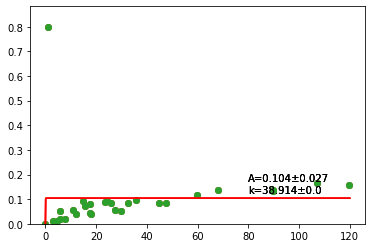

In [49]:
def example_curve(x_list, y_list):
    df_feature = pd.DataFrame({'x': x_list, 'y': y_list})
    x = x_list
    y = y_list
    
    '''
    Generate Initial Curve
    '''
#     print("initial curve_fitting")
    coeffs = curve_fitting(df_feature,random_iterations=3, color='red', plot_in_console=True)

#     '''
#     Remove Outliers
#     '''
#     if type(coeffs) != bool:
#         A, k = coeffs
#         print("[A,k]:",A,",",k)
#         C = 0
        
#         try:
#             H = (np.log((((A/2)/A)-1)*-1))/-k # half-life
#             print("Half-life:", H)
#         except:
#             H = np.nan
#             print("Half-life:", H)
#         try:
#             chisquared = calculate_residuals(df_feature, coeffs)
#             RSDR = get_RSDR(coeffs, df_feature)
#             print("Chi squard:", chisquared)
#             print("RSDR:", RSDR)
#         except:
#             print("error in calculation chisquared or RSDR (possible poor curve fitting)")
#             chisquared = np.nan
#             RSDR = np.nan
#         print("Checking for outliers")
#         df_feature, outliers_detected, n_used = remove_outliers(df_feature, coeffs)
#         print("Outliers detected and removed:", outliers_detected)
#         while outliers_detected > 0:
#             print("Recalculating curve")
#             coeffs = curve_fitting(df_feature)
#             if type(coeffs) != bool:
#                 A,k = coeffs
#                 print("[A,k]:",A,",",k)
#                 C = 0
#                 try:
#                     H = (np.log((((A/2)/A)-1)*-1))/-k # half-life
#                     print("Half-life:", H)
#                 except:
#                     H = np.nan
#                     print("Half-life:", H)
#                 try:
#                     chisquared = calculate_residuals(df_feature, coeffs)
#                     RSDR = get_RSDR(coeffs, df_feature)
#                     print("Chi squard:", chisquared)
#                     print("RSDR:", RSDR)
#                 except:
#                     print("error in calculation chisquared or RSDR (possible poor curve fitting)")
#                     chisquared = np.nan
#                     RSDR = np.nan
#                 print("Checking for outliers")
#                 df_feature, outliers_detected, n_used = remove_outliers(df_feature, coeffs)
#                 print("Outliers detected and removed:", outliers_detected)
#             else:
#                 chisquared, A, k, C, H = [np.nan, np.nan, np.nan, np.nan, np.nan]
#                 n_used = 0
#                 break
#     else:
#         chisquared, A, k, C, H = [np.nan, np.nan, np.nan, np.nan, np.nan]
#         n_used = 0
#     lower_x = 0
#     upper_x = 140
#     step_x = 0.01
    try:
        if type(coeffs_initial) != bool:

            t = curve_range = np.arange(0,upper_x,0.01)
            s = curve_data = model(curve_range,A,k)
        else:
            chisquared, RSDR, A, k, C, H = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
            n_used = 0
            t = np.nan
            s = np.nan

    except:
        t = np.nan
        s = np.nan
    
    
    return

'''
Example data set
'''
x_list = [1,0,3,4.75,5.666666667,5.75,7.6,10.78333333,12.18333333,14.78333333,15.73333333,17.75,17.76666667,17.81666667,23.53333333,24.16666667,25.76666667,27.31666667,29.93333333,32.66666667,35.88333333,44.78333333,47.5,59.58333333,67.88333333,89.76666667,89.83333333,107.2,119.7166667]
y_list = [0.8,0,0.011635376,0.01205788,0.0509542,0.019029791,0.017741336,0.057440817,0.040689357,0.091717184,0.07081078,0.081946418,0.044566058,0.039326504,0.086661801,0.094272077,0.082630873,0.056210607,0.051231094,0.083449088,0.095866196,0.08559528,0.085047297,0.116140626,0.137561575,0.137194544,0.132068843,0.165178776,0.15894556]
example_curve(x_list, y_list)

In [50]:
def calculate_residuals(dataframe_x_y,coeffs):
    A, k = coeffs
    this_data = dataframe_x_y[pd.isna(dataframe_x_y.y) == False]
    this_data['Predicted'] = model(this_data.x, A, k)
    this_data['|Residual|'] = abs(this_data['Predicted'] - this_data['y'])
    this_data['|Residual|^2'] = this_data['|Residual|']**2
    chisquared = float(sum(this_data['|Residual|^2']))
    return chisquared

def initial_curve_plot(x_list,y_list, color, plot_in_console):
    upper_x = 120 #Determines the x-limit of the chart
    df_feature = pd.DataFrame({'x': x_list, 'y': y_list})
    x = x_list
    y = y_list
    '''
    Generate Initial Curve
    '''
    coeffs, perr = curve_fitting(df_feature,random_iterations=1, color=color, plot_in_console=plot_in_console)
    A,k=coeffs
    t = curve_range = np.arange(0,upper_x,0.01)
    s = curve_data = model(curve_range,A,k)
    '''
    Check ChiSquared for data against curve (RSDR makes more sense for non-linear)
    '''
    ChiSquared = calculate_residuals(df_feature,coeffs)    
    return(coeffs,perr,t,s,ChiSquared)

   

In [51]:
def plot_to_excel(data_type, treatment_dfs_dictionary):
    book_name = data_type + '_output'
    excel_file = book_name + '.xlsx'
    with pd.ExcelWriter(excel_file, engine = "xlsxwriter") as writer:
    #     writer = pd.ExcelWriter(excel_file, engine = "xlsxwriter") # Assign name of function to use for excel manipulation (excel data file is assigned here)
        for treatment,data_df in treatment_dfs_dictionary.items():
            x_axis_column = 'Total labelling time (min) corrected' #set up the labels like this so I can send to function later if desired. Must match column header from dataframe
            x_axis_label = str(x_axis_column)
            y_axis_column = data_type
            y_axis_label = str(y_axis_column)
            cell_letter = 'D'
            cell_number = 1
            data_df[x_axis_column] = data_df[x_axis_column].astype(float)
            data=data_df
            end_index = data_df.columns.get_loc('Group') #First column to exclude
            exp_stats = pd.DataFrame(index = ['A','SD of A', 'k', 'SD of k', 'Chi^2']) #Dataframe will hold info on curves for sheet
            first_t = True
            for feature in data_df.iloc[:,1:end_index]:
                '''
                Get curve for data
                '''
                df_for_curve = data_df[data_df[feature]>0]
                x = df_for_curve['Total labelling time (min) corrected'].tolist()
                x.append(0)
                y = df_for_curve[feature].tolist()
                y.append(0)
                
                plot_in_console=False
                if plot_in_console:
                    plt.clf()
                coeffs,perr,t,s,ChiSquared = initial_curve_plot(x_list=x,y_list=y,color='black', plot_in_console=plot_in_console)
                A_SD, k_SD = perr
                A,k = coeffs
                if plot_in_console:
                    print(f'\n{treatment} {feature}')
                    print(f'A = {A.round(5)} +- {A_SD.round(5)}\nk = {k.round(5)} +- {k_SD.round(5)}\nChi^2 = {round(ChiSquared,5)}')
                    plt.show()
                '''
                Add information about curve into dataframe for sheet
                '''    
                exp_stats[feature] = A,A_SD,k,k_SD,ChiSquared
                '''
                Add data required to plot curve in excel into dataframe for sheet
                '''
                if first_t:
                    exp_curves = pd.DataFrame()
                    exp_curves[x_axis_label] = t
                    first_t = False
                exp_curves[feature]=s
            '''
            Convert dataframe to excel format in selected sheet
            '''
            data_sheet_name = data_type + '-' + treatment
            data.to_excel(writer, sheet_name = data_sheet_name)
            exp_curves_sheet_name = 'Exp curves' + treatment
            exp_curves.to_excel(writer, sheet_name = exp_curves_sheet_name)
            exp_stats_sheet_name = 'Exp stats' + treatment
            exp_stats.to_excel(writer, sheet_name = exp_stats_sheet_name)
            '''
            Start making excel charts (reiterate the treatment dataframe for clarity)
            '''
            for feature in data_df.iloc[:,1:end_index]:
                '''
                Data points as scatter plot first
                '''
                workbook = writer.book # workbook is the whole excel workbook
                worksheet = writer.sheets[data_sheet_name] # worksheet is the individual sheet in the workbook        
                max_rows = len(data) #data is the data_df in excel format
                chart_title = feature
                chart_cell = cell_letter + str(cell_number)    
                col_x = data.columns.get_loc(x_axis_label) + 1 # Excel starts counting columns at 1 (not 0)
                col_y = data.columns.get_loc(feature) + 1
                this_chart = workbook.add_chart({'type': 'scatter'})
                this_chart.add_series({
                    'name': chart_title,
                    'categories': [data_sheet_name, 1, col_x, max_rows, col_x],
                    'values': [data_sheet_name, 1, col_y, max_rows, col_y],
                    'marker': {'type': 'circle', 'size': 4},
            #         'trendline': {'type': 'linear', 'display_equation': True, 'display_r_squared': True},
                    'line': {'none': True},
                    'border': {'none': True} 
                    })
                '''
                Exponential curve next
                '''
                if data_df[feature].count() > 3: # Don't bother plotting if there are not > 3 data points for this feature
                    try:
                        worksheet2 = writer.sheets[exp_curves_sheet_name] # worksheet is the individual sheet in the workbook
                        max_rows_exponential = len(exp_curves)
                        col_x_exponential = exp_curves.columns.get_loc(x_axis_label) + 1
                        col_y_exponential = exp_curves.columns.get_loc(feature) + 1              
                        this_chart.add_series(
                            {
                            'subtype': 'smooth',
                            'name': 'exponential curve',
                            'categories': [exp_curves_sheet_name, 1, col_x_exponential, max_rows_exponential, col_x_exponential],
                            'values': [exp_curves_sheet_name, 1, col_y_exponential, max_rows_exponential, col_y_exponential],
                            'marker': {'type': 'none'},
                            'line': {'type': 'smooth', 'color': 'red'}
                            })
                        line_chart = workbook.add_chart({'type': 'scatter', 'subtype': 'smooth'})
                        line_chart.add_series(
                            {
                            'name': chart_title,
                            'categories': [sheet_name_exponential, 1, col_x_exponential, max_rows_exponential, col_x_exponential],
                            'values': [sheet_name_exponential, 1, col_y_exponential, max_rows_exponential, col_y_exponential],
                            'marker': {'type': 'none'},
                            'line': {'color': 'red'}
                    #         'border': {'none': True} 
                            })
                    #     this_chart.add_series({'type': 'line'})
                        curve_for_feature = True
                    except:
                        curve_for_feature = False
                else:
                    curve_for_feature = False
                '''
                Chart formatting
                '''
                this_chart.set_x_axis({
                    'name': x_axis_label,
                    'num_font': {'size': 12, 'name': 'Arial', 'color': 'black'},
                    'name_font': {'size': 12, 'name': 'Arial', 'color': 'black', 'bold': False},
                    'line': {'color': 'black'},
                    'min': 0,
                    'max': 130,
                    'major_unit': 20,
                    'crossing': 0,
                    'major_gridlines': {'visible': False},
                    'minor_gridlines': {'visible': False},
                    'major_tick_marks': 'outside',
                    'minor_tick_marks': 'none'
                })
                this_chart.set_y_axis({
                    'name': y_axis_label,
                    'num_font': {'size': 12, 'name': 'Arial', 'color': 'black'},
                    'name_font': {'size': 12, 'name': 'Arial', 'color': 'black', 'bold': False},
                    'line': {'color': 'black'},
                    'min': 0,
                    'crossing': 0,
                    'major_gridlines': {'visible': False},
                    'minor_gridlines': {'visible': False},
                    'major_tick_marks': 'outside',
                    'minor_tick_marks': 'none'
                })

                this_chart.set_title({
                        'name': chart_title,
                        'name_font': {'size': 12, 'bold': False, 'name':'Arial', 'color':'black'}
                    })
                this_chart.set_size({
                        'width': 400, 'height':300
                    })
                this_chart.set_legend({
                        'none': True
                    })
                this_chart.set_chartarea({
                    'border': {'none': True},
                    'fill':   {'color': 'white'}
                })
            #     line_chart.combine(this_chart)
                worksheet.insert_chart(chart_cell, this_chart)
                if curve_for_feature == True:
                    worksheet2.insert_chart(chart_cell, line_chart)


                cell_number += 16
            print('charts plotted for', treatment, data_type)
#     writer.save()
    return print('\ncharts plotted for', data_type, ' and saved to', excel_file, '\n')
plot_to_excel(data_type='F', treatment_dfs_dictionary=treatment_dfs_dictionary)

C:\Users\Matt\AppData\Local\Temp\ipykernel_11356\3600215373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df[x_axis_column] = data_df[x_axis_column].astype(float)


charts plotted for xpt F


C:\Users\Matt\AppData\Local\Temp\ipykernel_11356\3600215373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df[x_axis_column] = data_df[x_axis_column].astype(float)


charts plotted for WT F

charts plotted for F  and saved to F_output.xlsx 



In [52]:
def plot_label_curve(feature, treatment_dfs_dictionary,plot_in_console):
    plt.clf()
    color_list=['red','blue','orange','green','purple','yellow','cyan']
    colorid=0
    for name,df in treatment_dfs_dictionary.items():
        df = df[df[feature]>0]
        x = df['Total labelling time (min) corrected'].tolist()
        x.append(0)
        y = df[feature].tolist()
        y.append(0)
        if colorid < len(color_list):
            color = color_list[colorid]
        else:
            colorid = 0
            color = color_list[colorid]
        
        if plot_in_console:
            print(f'{name} {feature} ({color})')
            plt.plot(x, y, 'o', color=color, label = name)
        else:
            print(f'\n{name} {feature}')
        initial_curve_plot(x_list=x,y_list=y,color=color, plot_in_console=plot_in_console)
        colorid +=1
    if plot_in_console:
        plt.title(label=feature)
        plt.legend(loc = "upper right")
        plt.xlabel('Total labelling time (min) corrected')
        plt.ylabel('Normalized fractional labeling')
        plt.show()
    return

In [53]:
# quit()

In [54]:
for feature in profile_df['Peak']:  
    plot_label_curve(feature, treatment_dfs_dictionary, plot_in_console=False)


xpt *Glyoxylate (MeOx & TMS)

WT *Glyoxylate (MeOx & TMS)

xpt *Serine (2TMS)

WT *Serine (2TMS)

xpt *Glycine (3TMS)

WT *Glycine (3TMS)

xpt *Fumarate (2TMS)

WT *Fumarate (2TMS)

xpt *Aspartate (2TMS)

WT *Aspartate (2TMS)

xpt *Malate (3TMS)

WT *Malate (3TMS)

xpt *Shikimate (4TMS)

WT *Shikimate (4TMS)


<Figure size 432x288 with 0 Axes>

In [55]:

def plot_label_boxplot():
    return

def plot_area_boxplot(feature, treatment_dfs_dictionary_Areas, groupnames, yaxis):
    boxplot_list = []
    for name,df in treatment_dfs_dictionary_Areas.items():
        x = df['Total labelling time (min) corrected'].tolist()
        y = df[feature].tolist()
        y_filtered = [value for value in y if np.isnan(value) == False]
        boxplot_list.append(y_filtered)
    #         plt.clf()
    #         plt.scatter(x,y)
    #         plt.title(label=feature)
    #         plt.show()
#             plt.plot(x, y, 'o')
    try:
        a,b = boxplot_list[0],boxplot_list[1]
    #     t, p = ttest_ind(a, b, equal_var=False) # t-test
        U1, p = MannwhitneyuResult = sps.mannwhitneyu(a,b)
        SDa = np.std(a)
        SDb = np.std(b)

        try:
            meana = np.mean(a)
            meanb = np.mean(b)
            plt.annotate(f'mean={meana.round(5)}\nSD={SDa.round(5)}', xy=(1.1,meana), xytext=(1.1, meana))
            plt.annotate(f'mean={meanb.round(5)}\nSD={SDb.round(5)}\np={p.round(5)}', xy=(2.1, meanb), xytext=(2.1, meanb))
        except:
            print("error")
        plt.boxplot(boxplot_list)
        plt.title(label=feature)
    #         plt.legend(treatments)
        plt.xlabel('Group')

        plt.xticks(np.arange(1,boxplot_ticks,1), labels=treatments, rotation=20)
        plt.ylabel(yaxis)
        plt.show()
    except:
        print(f'Could not generate boxplot for {feature} {yaxis}')
    return

In [56]:
## Not functional

# from sklearn.decomposition import PCA

# def draw_vector(v0, v1, ax=None):
#     ax = ax or plt.gca()
#     arrowprops=dict(arrowstyle='->',
#                     linewidth=2,
#                     shrinkA=0, shrinkB=0)
#     ax.annotate('', v1, v0, arrowprops=arrowprops)






# def pca_areas(df, features):
#     df = df.replace(np.NaN, 0)
# #     print(df[features])
#     pca = PCA()
#     components = pca.fit_transform(df[features])
#     print(components)
#     labels = {
#         str(i): f"PC {i+1} ({var:.1f}%)"
#         for i, var in enumerate(pca.explained_variance_ratio_ * 100)
#     }
#     print(labels)
#     pca.fit(df[features])
#     print(pca.components_)
#     print(pca.explained_variance_)
    
#     # plot data
#     plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
#     for length, vector in zip(pca.explained_variance_, pca.components_):
#         v = vector * 3 * np.sqrt(length)
#         draw_vector(pca.mean_, pca.mean_ + v)
#     plt.axis('equal');


# pca_areas(df=dictionary_of_dfs['rel_areas_df'], features=profile_df['Peak'].tolist())

xpt *Glyoxylate (MeOx & TMS) (red)
WT *Glyoxylate (MeOx & TMS) (blue)


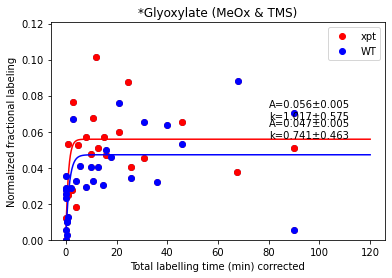

xpt *Serine (2TMS) (red)
WT *Serine (2TMS) (blue)


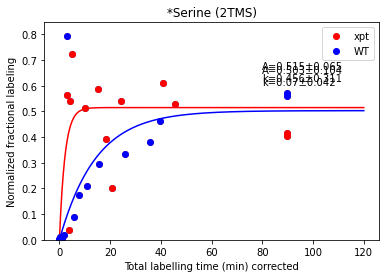

xpt *Glycine (3TMS) (red)
WT *Glycine (3TMS) (blue)


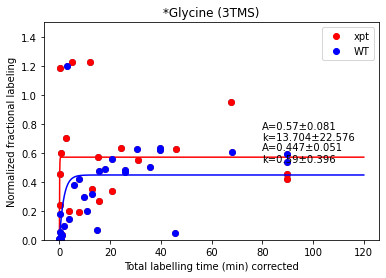

xpt *Fumarate (2TMS) (red)
WT *Fumarate (2TMS) (blue)


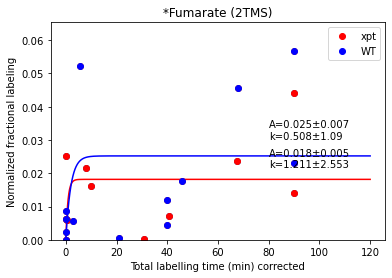

xpt *Aspartate (2TMS) (red)
WT *Aspartate (2TMS) (blue)


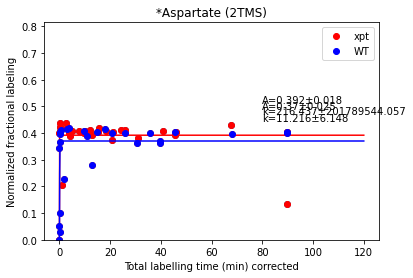

xpt *Malate (3TMS) (red)
WT *Malate (3TMS) (blue)


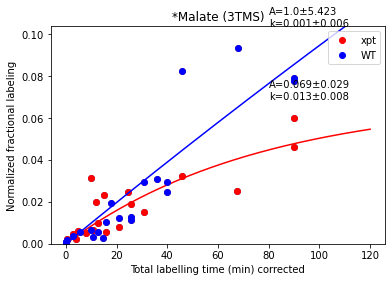

xpt *Shikimate (4TMS) (red)
WT *Shikimate (4TMS) (blue)


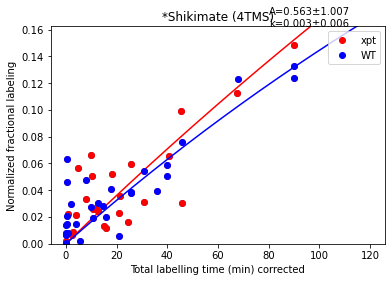

In [57]:
# x = np.linspace(0, 10, 30)
# y = np.sin(x)
# plt.plot(x, y, 'o', color='black');
boxplot_ticks = number_of_treatments + 1
legendlabels = np.repeat(treatments, 2)

for feature in profile_df['Peak']:  
    plot_label_curve(feature, treatment_dfs_dictionary, plot_in_console=True)
    if use_areas == True:
        plot_area_boxplot(feature, treatment_dfs_dictionary_RawAreas, boxplot_ticks, 'RawArea')
#         plot_area_boxplot(feature, treatment_dfs_dictionary_RelAreas, boxplot_ticks, 'RelArea') # This is commented out because I suspect an error in RelArea table
        
if use_areas == True:
    feature_list = profile_df['Peak'].tolist()
    

In [58]:
for feature in profile_df['Peak']:  
#     plot_label_curve(feature, treatment_dfs_dictionary, legendlabels)
    for name,df in treatment_dfs_dictionary.items():
        df = df[df[feature]>0]
        x = df['Total labelling time (min) corrected'].tolist()
        x.append(0)
        y = df[feature].tolist()
        y.append(0)

        print(f'{name} ({feature})')
        
    

xpt (*Glyoxylate (MeOx & TMS))
WT (*Glyoxylate (MeOx & TMS))
xpt (*Serine (2TMS))
WT (*Serine (2TMS))
xpt (*Glycine (3TMS))
WT (*Glycine (3TMS))
xpt (*Fumarate (2TMS))
WT (*Fumarate (2TMS))
xpt (*Aspartate (2TMS))
WT (*Aspartate (2TMS))
xpt (*Malate (3TMS))
WT (*Malate (3TMS))
xpt (*Shikimate (4TMS))
WT (*Shikimate (4TMS))


In [59]:
'''
Retention index
'''

'\nRetention index\n'

In [60]:
'''
Adduct ratios
'''

'\nAdduct ratios\n'

In [61]:
'''
Compare to predicted F unlabeled (natural abundance)
'''

'\nCompare to predicted F unlabeled (natural abundance)\n'

In [62]:
'''
Curves
'''

'\nCurves\n'

In [63]:
'''
Graph into excel
'''

'\nGraph into excel\n'

In [64]:
'''
set this up into modules based on function
'''


'\nset this up into modules based on function\n'

In [65]:
'''
Make super simple version for metaboanalyst upload.

Add in curves, sample data etc...
'''

'\nMake super simple version for metaboanalyst upload.\n\nAdd in curves, sample data etc...\n'

In [66]:
quit()